## Step 1: Load the data

In [1]:
!pip install pandas


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("star_wars_character_dataset.csv")

In [3]:
df.head()

name  height   mass hair_color   skin_color eye_color  \
0  Luke Skywalker   172.0   77.0      blond         fair      blue   
1           C-3PO   167.0   75.0        NaN         gold    yellow   
2           R2-D2    96.0   32.0        NaN  white, blue       red   
3     Darth Vader   202.0  136.0       none        white    yellow   
4     Leia Organa   150.0   49.0      brown        light     brown   

   birth_year     sex     gender homeworld species  \
0        19.0    male  masculine  Tatooine   Human   
1       112.0    none  masculine  Tatooine   Droid   
2        33.0    none  masculine     Naboo   Droid   
3        41.9    male  masculine  Tatooine   Human   
4        19.0  female   feminine  Alderaan   Human   

                                               films  \
0  The Empire Strikes Back, Revenge of the Sith, ...   
1  The Empire Strikes Back, Attack of the Clones,...   
2  The Empire Strikes Back, Attack of the Clones,...   
3  The Empire Strikes Back, Revenge of the Sith, ...   
4  The Empire Strikes Back, Revenge of the Sith, ...   

                             vehicles                 starships  
0  Snowspeeder, Imperial Speeder Bike  X-wing, Imperial shuttle  
1                                 NaN                       NaN  
2                                 NaN                       NaN  
3                                 NaN           TIE Advanced x1  
4               Imperial Speeder Bike                       NaN

In [4]:
df.shape

(87, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
 11  films       87 non-null     object 
 12  vehicles    11 non-null     object 
 13  starships   20 non-null     object 
dtypes: float64(3), object(11)
memory usage: 9.6+ KB


In [6]:
df.isnull().sum()

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
films          0
vehicles      76
starships     67
dtype: int64

In [7]:
df.mass.describe()

count      59.000000
mean       97.311864
std       169.457163
min        15.000000
25%        55.600000
50%        79.000000
75%        84.500000
max      1358.000000
Name: mass, dtype: float64

In [8]:
## removing max mass to adjust the mean and std and filling null values with mean data
df.drop(df[df.mass == np.max(df.mass)].index,inplace=True)
df.mass.fillna(df.mass.mean(),inplace=True)

In [9]:
df.birth_year.describe()

count     42.000000
mean      75.364286
std      133.999900
min        8.000000
25%       34.000000
50%       50.000000
75%       70.750000
max      896.000000
Name: birth_year, dtype: float64

In [10]:
## removing max birth_year to adjust the mean and std and filling null values with mean data
df.drop(df[df.birth_year == np.max(df.birth_year)].index,inplace=True)
df.drop(df[df.birth_year == np.max(df.birth_year)].index,inplace=True)
df.birth_year.fillna(df.birth_year.mean(),inplace=True)

In [11]:
df.birth_year.describe()

count     84.000000
mean      51.732500
std       17.313345
min        8.000000
25%       50.799375
50%       51.732500
75%       51.732500
max      112.000000
Name: birth_year, dtype: float64

In [12]:
df["hair_color"] = df.hair_color.str.split(',').str[0]
df["eye_color"] = df.eye_color.str.split(',').str[0]
df["skin_color"] = df.skin_color.str.split(',').str[0]

In [13]:
df["hair_color"].value_counts()

none       37
brown      18
black      13
blond       3
auburn      3
white       3
grey        1
blonde      1
unknown     1
Name: hair_color, dtype: int64

In [14]:
## filling null values for hair color with none 
df.hair_color.fillna('none',inplace=True)

In [15]:
df.species.value_counts()

Human           35
Droid            6
Gungan           3
Mirialan         2
Twi'lek          2
Zabrak           2
Kaminoan         2
Aleena           1
Skakoan          1
Quermian         1
Besalisk         1
Muun             1
Togruta          1
Clawdite         1
Kaleesh          1
Geonosian        1
Chagrian         1
Wookiee          1
Kel Dor          1
Nautolan         1
Iktotchi         1
Tholothian       1
Cerean           1
Toong            1
Xexto            1
Vulptereen       1
Dug              1
Toydarian        1
Neimodian        1
Sullustan        1
Ewok             1
Mon Calamari     1
Trandoshan       1
Rodian           1
Pau'an           1
Name: species, dtype: int64

In [16]:
df.homeworld.value_counts().count()

47

In [17]:
## filling null values for sex, gender, homeworld and species with random 
import random
df.gender.fillna(random.choice(['masculine','feminine']),inplace=True)
df.sex.fillna(random.choice(['female','male','hermaphroditic']),inplace=True)
df.homeworld.fillna(random.choice(['Naboo','Tatooine']),inplace=True)
df.species.fillna(random.choice(['Human','Droid']),inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 86
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        84 non-null     object 
 1   height      78 non-null     float64
 2   mass        84 non-null     float64
 3   hair_color  84 non-null     object 
 4   skin_color  84 non-null     object 
 5   eye_color   84 non-null     object 
 6   birth_year  84 non-null     float64
 7   sex         84 non-null     object 
 8   gender      84 non-null     object 
 9   homeworld   84 non-null     object 
 10  species     84 non-null     object 
 11  films       84 non-null     object 
 12  vehicles    10 non-null     object 
 13  starships   19 non-null     object 
dtypes: float64(3), object(11)
memory usage: 9.8+ KB


In [19]:
## removing vehicles and starships as it's mostly empty and filling mean height for remaining dataframe
df.drop(['vehicles','starships'],axis=1,inplace=True)
df.height.fillna(df.height.mean(),inplace=True)

In [20]:
## no duplicate values
df.duplicated().sum()

0

In [21]:
df

name      height        mass hair_color skin_color eye_color  \
0   Luke Skywalker  172.000000   77.000000      blond       fair      blue   
1            C-3PO  167.000000   75.000000       none       gold    yellow   
2            R2-D2   96.000000   32.000000       none      white       red   
3      Darth Vader  202.000000  136.000000       none      white    yellow   
4      Leia Organa  150.000000   49.000000      brown      light     brown   
..             ...         ...         ...        ...        ...       ...   
82             Rey  175.051282   75.575862      brown      light     hazel   
83     Poe Dameron  175.051282   75.575862      brown      light     brown   
84             BB8  175.051282   75.575862       none       none     black   
85  Captain Phasma  175.051282   75.575862    unknown    unknown   unknown   
86   Padmé Amidala  165.000000   45.000000      brown      light     brown   

    birth_year             sex     gender homeworld species  \
0      19.0000            male  masculine  Tatooine   Human   
1     112.0000            none  masculine  Tatooine   Droid   
2      33.0000            none  masculine     Naboo   Droid   
3      41.9000            male  masculine  Tatooine   Human   
4      19.0000          female   feminine  Alderaan   Human   
..         ...             ...        ...       ...     ...   
82     51.7325          female   feminine     Naboo   Human   
83     51.7325            male  masculine     Naboo   Human   
84     51.7325            none  masculine     Naboo   Droid   
85     51.7325  hermaphroditic  masculine     Naboo   Human   
86     46.0000          female   feminine     Naboo   Human   

                                                films  
0   The Empire Strikes Back, Revenge of the Sith, ...  
1   The Empire Strikes Back, Attack of the Clones,...  
2   The Empire Strikes Back, Attack of the Clones,...  
3   The Empire Strikes Back, Revenge of the Sith, ...  
4   The Empire Strikes Back, Revenge of the Sith, ...  
..                                                ...  
82                                  The Force Awakens  
83                                  The Force Awakens  
84                                  The Force Awakens  
85                                  The Force Awakens  
86  Attack of the Clones, The Phantom Menace, Reve...  

[84 rows x 12 columns]

## Step 2: Data Preprocessing

In [22]:
df_object = df[['hair_color','skin_color','eye_color','sex','gender','species','films']]

df_float = df[['height','mass','birth_year']]

In [23]:
# Training the Model
from sklearn.linear_model import LogisticRegression

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("encode", OneHotEncoder(), ["hair_color",	"skin_color",	"eye_color", "sex",	"gender",	"species",	"films"]),
        ],
        remainder="passthrough",
    ),
)

In [25]:
enco = pipe.fit_transform(df_object).toarray()

In [26]:
enco.shape, df_float.shape

((84, 107), (84, 3))

In [27]:
frames =  [enco, df_float.values]

In [28]:
X = np.concatenate(frames, axis = 1)

In [29]:
X

array([[  0.        ,   0.        ,   1.        , ..., 172.        ,
         77.        ,  19.        ],
       [  0.        ,   0.        ,   0.        , ..., 167.        ,
         75.        , 112.        ],
       [  0.        ,   0.        ,   0.        , ...,  96.        ,
         32.        ,  33.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 175.05128205,
         75.57586207,  51.7325    ],
       [  0.        ,   0.        ,   0.        , ..., 175.05128205,
         75.57586207,  51.7325    ],
       [  0.        ,   0.        ,   0.        , ..., 165.        ,
         45.        ,  46.        ]])

In [30]:
ordinalencoder = OrdinalEncoder()
y = (ordinalencoder.fit_transform(df.homeworld.values.reshape(-1,1)))

In [31]:
y.shape

(84, 1)

In [32]:
ordinalencoder.categories_

[array(['Alderaan', 'Aleen Minor', 'Bespin', 'Bestine IV',
        'Cato Neimoidia', 'Cerea', 'Champala', 'Chandrila', 'Concord Dawn',
        'Corellia', 'Coruscant', 'Dathomir', 'Dorin', 'Endor', 'Eriadu',
        'Geonosis', 'Glee Anselm', 'Haruun Kal', 'Iktotch', 'Iridonia',
        'Kalee', 'Kamino', 'Kashyyyk', 'Malastare', 'Mirial', 'Mon Cala',
        'Muunilinst', 'Naboo', 'Ojom', 'Quermia', 'Rodia', 'Ryloth',
        'Serenno', 'Shili', 'Skako', 'Socorro', 'Stewjon', 'Sullust',
        'Tatooine', 'Toydaria', 'Trandosha', 'Troiken', 'Tund', 'Umbara',
        'Utapau', 'Vulpter', 'Zolan'], dtype=object)]

In [33]:
for i, n in enumerate(ordinalencoder.categories_[0]):
    print(i, n)

0 Alderaan
1 Aleen Minor
2 Bespin
3 Bestine IV
4 Cato Neimoidia
5 Cerea
6 Champala
7 Chandrila
8 Concord Dawn
9 Corellia
10 Coruscant
11 Dathomir
12 Dorin
13 Endor
14 Eriadu
15 Geonosis
16 Glee Anselm
17 Haruun Kal
18 Iktotch
19 Iridonia
20 Kalee
21 Kamino
22 Kashyyyk
23 Malastare
24 Mirial
25 Mon Cala
26 Muunilinst
27 Naboo
28 Ojom
29 Quermia
30 Rodia
31 Ryloth
32 Serenno
33 Shili
34 Skako
35 Socorro
36 Stewjon
37 Sullust
38 Tatooine
39 Toydaria
40 Trandosha
41 Troiken
42 Tund
43 Umbara
44 Utapau
45 Vulpter
46 Zolan


In [34]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)
rus.fit(X, y)
X_train_smote, y_train_smote = rus.fit_resample(X, y)

In [35]:
X_train_smote.shape, y_train_smote.shape

((940, 110), (940,))

In [36]:
# Split the Data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train_smote,y_train_smote,test_size=0.3,random_state=42)

In [37]:
#shapes of splitted data
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (658, 110)
X_test: (282, 110)
Y_train: (658,)
Y_test: (282,)


## Step 3: Creating Baseline

In [38]:
logi = LogisticRegression()

In [39]:
baseline = logi.fit(X_train, y_train)

C:\Users\riyup\.conda\envs\tf_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
y_pred = baseline.predict(X_test)

In [41]:
from sklearn.metrics import r2_score, accuracy_score, f1_score, mean_squared_error, confusion_matrix

r2_score_value = r2_score(y_test, y_pred)
r2_score_value

0.7601965426922674

In [42]:
accuracy_score(y_test, y_pred)

0.8829787234042553

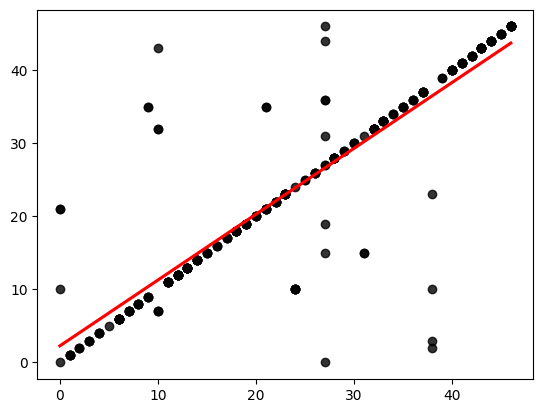

In [43]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"});

In [44]:
import math
mse_baseline = mean_squared_error(y_test, y_pred)  
rmse_baseline = math.sqrt(mse_baseline)  
  
print("Root Mean Squared Error: ", rmse_baseline) 
print("Mean Squared Error: ", mse_baseline)

Root Mean Squared Error:  6.4667726831991095
Mean Squared Error:  41.819148936170215


## Model 1: With 2 Dense layers

In [45]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers

In [46]:
X_train_tf = tf.convert_to_tensor(X_train.astype(np.float64))
X_test_tf = tf.convert_to_tensor(X_test.astype(np.float64))
y_train_tf = tf.convert_to_tensor(y_train.astype(np.float64))
y_test_tf = tf.convert_to_tensor(y_test.astype(np.float64))

In [47]:
X_train.shape, X_test.shape

((658, 110), (282, 110))

In [48]:
X_test_tf.shape, X_train_tf.shape

(TensorShape([282, 110]), TensorShape([658, 110]))

In [49]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.

    Args:
      history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend();

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [50]:
model_1 = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation="relu"),
    layers.Dense(47, activation="softmax")
])

model_1.compile(loss="sparse_categorical_crossentropy", optimizer=optimizers.Adam(), metrics=["accuracy"])

In [51]:
history_1 = model_1.fit(X_train_tf, y_train_tf, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
21/21 [==============================] - 1s 11ms/step - loss: 11.3743 - accuracy: 0.0289 - val_loss: 5.4935 - val_accuracy: 0.0355
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 4.5734 - accuracy: 0.0836 - val_loss: 3.5204 - val_accuracy: 0.1383
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 3.0919 - accuracy: 0.2204 - val_loss: 2.7962 - val_accuracy: 0.3227
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 2.3759 - accuracy: 0.4438 - val_loss: 2.2907 - val_accuracy: 0.5390
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 1.9371 - accuracy: 0.5502 - val_loss: 1.9377 - val_accuracy: 0.6170
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 1.5749 - accuracy: 0.7249 - val_loss: 1.6013 - val_accuracy: 0.6879
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 1.3267 - accuracy: 0.7872 - val_loss: 1.3394 - val_accuracy: 0.7837
Epoch 8/100

Epoch 59/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.0563 - val_accuracy: 0.9894
Epoch 60/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9965
Epoch 61/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0207 - accuracy: 0.9985 - val_loss: 0.0584 - val_accuracy: 0.9894
Epoch 62/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.0503 - val_accuracy: 0.9965
Epoch 63/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0476 - val_accuracy: 0.9965
Epoch 64/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9985 - val_loss: 0.0520 - val_accuracy: 0.9929
Epoch 65/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.9965
Epoch 

In [52]:
y_pred_1 = model_1.predict(X_test_tf)

9/9 [==============================] - 0s 1ms/step


In [53]:
model_1.evaluate(X_test_tf, y_test_tf)

9/9 [==============================] - 0s 982us/step - loss: 0.0419 - accuracy: 0.9965


[0.04191071540117264, 0.9964538812637329]

In [54]:
df_history_1 = pd.DataFrame(history_1.history)
df_history_1

loss  accuracy  val_loss  val_accuracy
0   11.374345  0.028875  5.493479      0.035461
1    4.573410  0.083587  3.520423      0.138298
2    3.091890  0.220365  2.796206      0.322695
3    2.375943  0.443769  2.290737      0.539007
4    1.937063  0.550152  1.937668      0.617021
..        ...       ...       ...           ...
95   0.006547  1.000000  0.045550      0.996454
96   0.006922  1.000000  0.041447      0.996454
97   0.006258  1.000000  0.041751      0.996454
98   0.005798  1.000000  0.046906      0.989362
99   0.006344  1.000000  0.041911      0.996454

[100 rows x 4 columns]

In [55]:
import plotly.express as px

fig = px.line(df_history_1, y=['loss', 'val_loss'], labels=['Loss', 'Validation Loss'])
fig.show()

## Model 2: With SGD Optimizer

In [56]:
model_2 = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation="relu"),
    layers.Dense(47, activation="softmax")
])

model_2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizers.SGD(), metrics=["accuracy"])

In [57]:
history_2 = model_2.fit(X_train_tf, y_train_tf, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
21/21 [==============================] - 0s 10ms/step - loss: 20.4059 - accuracy: 0.0152 - val_loss: 3.8965 - val_accuracy: 0.0071
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8435 - accuracy: 0.0198 - val_loss: 3.8382 - val_accuracy: 0.0035
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8376 - accuracy: 0.0289 - val_loss: 3.8410 - val_accuracy: 0.0213
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8370 - accuracy: 0.0456 - val_loss: 3.8402 - val_accuracy: 0.0213
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8336 - accuracy: 0.0441 - val_loss: 3.8607 - val_accuracy: 0.0177
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 3.8314 - accuracy: 0.0441 - val_loss: 3.8511 - val_accuracy: 0.0177
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8232 - accuracy: 0.0486 - val_loss: 3.8304 - val_accuracy: 0.0213
Epoch 8/100

21/21 [==============================] - 0s 3ms/step - loss: 3.5359 - accuracy: 0.0502 - val_loss: 3.5496 - val_accuracy: 0.0390
Epoch 59/100
21/21 [==============================] - 0s 3ms/step - loss: 3.5560 - accuracy: 0.0578 - val_loss: 3.5548 - val_accuracy: 0.0248
Epoch 60/100
21/21 [==============================] - 0s 3ms/step - loss: 3.5289 - accuracy: 0.0502 - val_loss: 3.5567 - val_accuracy: 0.0248
Epoch 61/100
21/21 [==============================] - 0s 3ms/step - loss: 3.5300 - accuracy: 0.0502 - val_loss: 3.5404 - val_accuracy: 0.0248
Epoch 62/100
21/21 [==============================] - 0s 3ms/step - loss: 3.5253 - accuracy: 0.0578 - val_loss: 3.5377 - val_accuracy: 0.0248
Epoch 63/100
21/21 [==============================] - 0s 3ms/step - loss: 3.5191 - accuracy: 0.0486 - val_loss: 3.5348 - val_accuracy: 0.0248
Epoch 64/100
21/21 [==============================] - 0s 3ms/step - loss: 3.5327 - accuracy: 0.0532 - val_loss: 3.5337 - val_accuracy: 0.0142
Epoch 65/100
21/21 

In [58]:
y_pred_2 = model_2.predict(X_test_tf)

9/9 [==============================] - 0s 2ms/step


In [59]:
model_2.evaluate(X_test_tf, y_test_tf)

9/9 [==============================] - 0s 1000us/step - loss: 3.1181 - accuracy: 0.1277


[3.1180949211120605, 0.12765957415103912]

In [60]:
df_history_2 = pd.DataFrame(history_2.history)

In [61]:
fig = px.line(df_history_2, y=['loss', 'val_loss'], labels=['Loss', 'Validation Loss'])
fig.show()

## Model 3: With SGD and reduced learing rate

In [62]:
model_3 = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation="relu"),
    layers.Dense(47, activation="softmax")
])

model_3.compile(loss="sparse_categorical_crossentropy", optimizer=optimizers.SGD(learning_rate=0.001), metrics=["accuracy"])

In [63]:
history_3 = model_3.fit(X_train_tf, y_train_tf, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
21/21 [==============================] - 0s 9ms/step - loss: 14.4892 - accuracy: 0.0213 - val_loss: 8.4357 - val_accuracy: 0.0567
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 6.5982 - accuracy: 0.0426 - val_loss: 6.2855 - val_accuracy: 0.0213
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 4.8942 - accuracy: 0.0532 - val_loss: 5.5672 - val_accuracy: 0.0284
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 4.9371 - accuracy: 0.0684 - val_loss: 7.3668 - val_accuracy: 0.0532
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 5.0061 - accuracy: 0.0745 - val_loss: 4.7228 - val_accuracy: 0.0780
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 4.2409 - accuracy: 0.0836 - val_loss: 4.6796 - val_accuracy: 0.0390
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 3.8777 - accuracy: 0.0684 - val_loss: 4.4357 - val_accuracy: 0.0461
Epoch 8/100


Epoch 59/100
21/21 [==============================] - 0s 3ms/step - loss: 2.1599 - accuracy: 0.3663 - val_loss: 2.2884 - val_accuracy: 0.3582
Epoch 60/100
21/21 [==============================] - 0s 3ms/step - loss: 2.0927 - accuracy: 0.3936 - val_loss: 2.7046 - val_accuracy: 0.2199
Epoch 61/100
21/21 [==============================] - 0s 3ms/step - loss: 2.1461 - accuracy: 0.3815 - val_loss: 2.4644 - val_accuracy: 0.2872
Epoch 62/100
21/21 [==============================] - 0s 3ms/step - loss: 2.1025 - accuracy: 0.3815 - val_loss: 2.8568 - val_accuracy: 0.2092
Epoch 63/100
21/21 [==============================] - 0s 3ms/step - loss: 2.1007 - accuracy: 0.3708 - val_loss: 2.2001 - val_accuracy: 0.4113
Epoch 64/100
21/21 [==============================] - 0s 3ms/step - loss: 2.0423 - accuracy: 0.3906 - val_loss: 2.2326 - val_accuracy: 0.3440
Epoch 65/100
21/21 [==============================] - 0s 3ms/step - loss: 2.1045 - accuracy: 0.3799 - val_loss: 2.3143 - val_accuracy: 0.2979
Epoch 

In [64]:
y_pred_3 = model_3.predict(X_test_tf)

9/9 [==============================] - 0s 1ms/step


In [65]:
model_3.evaluate(X_test_tf, y_test_tf)

9/9 [==============================] - 0s 2ms/step - loss: 2.0703 - accuracy: 0.3298


[2.0702500343322754, 0.3297872245311737]

In [66]:
df_history_3 = pd.DataFrame(history_3.history)

In [67]:
fig = px.line(df_history_3, y=['loss', 'val_loss'], labels=['Loss', 'Validation Loss'])
fig.show()

## Model 4: SGD with 0.005 learning rate

In [68]:
model_4 = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation="relu"),
    layers.Dense(47, activation="softmax")
])

model_4.compile(loss="sparse_categorical_crossentropy", optimizer=optimizers.SGD(learning_rate=0.005), metrics=["accuracy"])

In [69]:
history_4 = model_4.fit(X_train_tf, y_train_tf, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
21/21 [==============================] - 0s 8ms/step - loss: 19.1908 - accuracy: 0.0289 - val_loss: 3.7442 - val_accuracy: 0.1241
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 3.7318 - accuracy: 0.0760 - val_loss: 3.7503 - val_accuracy: 0.0887
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 3.7069 - accuracy: 0.0593 - val_loss: 3.6895 - val_accuracy: 0.1028
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 3.6832 - accuracy: 0.0912 - val_loss: 3.6896 - val_accuracy: 0.0709
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 3.6758 - accuracy: 0.0881 - val_loss: 3.7536 - val_accuracy: 0.1028
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 3.6305 - accuracy: 0.0973 - val_loss: 3.7053 - val_accuracy: 0.0922
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 3.5982 - accuracy: 0.1125 - val_loss: 3.6539 - val_accuracy: 0.0851
Epoch 8/100


Epoch 59/100
21/21 [==============================] - 0s 3ms/step - loss: 1.6937 - accuracy: 0.5076 - val_loss: 1.8943 - val_accuracy: 0.4149
Epoch 60/100
21/21 [==============================] - 0s 3ms/step - loss: 1.7237 - accuracy: 0.4757 - val_loss: 1.7826 - val_accuracy: 0.4716
Epoch 61/100
21/21 [==============================] - 0s 3ms/step - loss: 1.6383 - accuracy: 0.5334 - val_loss: 1.7604 - val_accuracy: 0.4574
Epoch 62/100
21/21 [==============================] - 0s 3ms/step - loss: 1.6049 - accuracy: 0.5426 - val_loss: 1.6902 - val_accuracy: 0.5142
Epoch 63/100
21/21 [==============================] - 0s 3ms/step - loss: 1.6883 - accuracy: 0.5304 - val_loss: 1.7393 - val_accuracy: 0.4965
Epoch 64/100
21/21 [==============================] - 0s 3ms/step - loss: 1.6303 - accuracy: 0.5228 - val_loss: 1.6676 - val_accuracy: 0.4858
Epoch 65/100
21/21 [==============================] - 0s 3ms/step - loss: 1.6203 - accuracy: 0.5258 - val_loss: 1.7056 - val_accuracy: 0.4504
Epoch 

In [70]:
y_pred_4 = model_4.predict(X_test_tf)

9/9 [==============================] - 0s 0s/step


In [71]:
model_4.evaluate(X_test_tf, y_test_tf)

9/9 [==============================] - 0s 2ms/step - loss: 1.4557 - accuracy: 0.5000


[1.4557349681854248, 0.5]

In [72]:
df_history_4 = pd.DataFrame(history_4.history)

In [73]:
fig = px.line(df_history_4, y=['loss', 'val_loss'], labels=['Loss', 'Validation Loss'])
fig.show()

## Model 5: With SGD and 0.05 learning rate

In [74]:
model_5 = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation="relu"),
    layers.Dense(47, activation="softmax")
])

model_5.compile(loss="sparse_categorical_crossentropy", optimizer=optimizers.SGD(learning_rate=0.05), metrics=["accuracy"])

In [75]:
history_5 = model_5.fit(X_train_tf, y_train_tf, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
21/21 [==============================] - 1s 7ms/step - loss: 277.6228 - accuracy: 0.0167 - val_loss: 3.8519 - val_accuracy: 0.0035
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 3.8499 - accuracy: 0.0213 - val_loss: 3.8537 - val_accuracy: 0.0035
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8492 - accuracy: 0.0137 - val_loss: 3.8553 - val_accuracy: 0.0035
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 3.8485 - accuracy: 0.0289 - val_loss: 3.8568 - val_accuracy: 0.0035
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8480 - accuracy: 0.0289 - val_loss: 3.8584 - val_accuracy: 0.0035
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8474 - accuracy: 0.0289 - val_loss: 3.8600 - val_accuracy: 0.0035
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 3.8469 - accuracy: 0.0289 - val_loss: 3.8616 - val_accuracy: 0.0035
Epoch 8/100

Epoch 59/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8358 - accuracy: 0.0289 - val_loss: 3.9145 - val_accuracy: 0.0035
Epoch 60/100
21/21 [==============================] - 0s 2ms/step - loss: 3.8357 - accuracy: 0.0289 - val_loss: 3.9150 - val_accuracy: 0.0035
Epoch 61/100
21/21 [==============================] - 0s 2ms/step - loss: 3.8357 - accuracy: 0.0289 - val_loss: 3.9156 - val_accuracy: 0.0035
Epoch 62/100
21/21 [==============================] - 0s 2ms/step - loss: 3.8355 - accuracy: 0.0289 - val_loss: 3.9160 - val_accuracy: 0.0035
Epoch 63/100
21/21 [==============================] - 0s 2ms/step - loss: 3.8356 - accuracy: 0.0289 - val_loss: 3.9166 - val_accuracy: 0.0035
Epoch 64/100
21/21 [==============================] - 0s 2ms/step - loss: 3.8356 - accuracy: 0.0289 - val_loss: 3.9172 - val_accuracy: 0.0035
Epoch 65/100
21/21 [==============================] - 0s 2ms/step - loss: 3.8355 - accuracy: 0.0289 - val_loss: 3.9177 - val_accuracy: 0.0035
Epoch 

In [76]:
y_pred_5 = model_5.predict(X_test_tf)

9/9 [==============================] - 0s 2ms/step


In [77]:
model_5.evaluate(X_test_tf, y_test_tf)

9/9 [==============================] - 0s 2ms/step - loss: 3.9314 - accuracy: 0.0035


[3.9313576221466064, 0.003546099178493023]

In [78]:
df_history_5 = pd.DataFrame(history_5.history)

In [79]:
fig = px.line(df_history_5, y=['loss', 'val_loss'], labels=['Loss', 'Validation Loss'])
fig.show()

### Let's explore predicted results

This wil indicate probablity of first preictions being in each class.

In [80]:
y_pred_1[0]

array([4.8449532e-08, 3.5367210e-16, 7.6645368e-04, 3.1939714e-04,
       2.4672414e-04, 1.2412488e-07, 2.2907568e-07, 2.4982702e-04,
       1.4525743e-06, 3.7733134e-05, 6.2474800e-07, 2.2881359e-04,
       2.1208020e-08, 2.6287230e-13, 7.6839191e-10, 8.7677210e-05,
       3.6283085e-04, 4.8827951e-06, 1.6351011e-06, 8.1181475e-05,
       1.2000803e-05, 1.3543415e-05, 1.0420146e-03, 1.0558730e-13,
       6.4393108e-10, 4.0226284e-04, 1.3963463e-06, 1.0608255e-04,
       9.9502450e-01, 1.0040873e-09, 1.0059102e-05, 5.0157132e-07,
       1.9160314e-13, 9.2843658e-12, 3.5786619e-13, 8.6034364e-05,
       6.2172984e-07, 7.3428723e-08, 1.2153090e-04, 2.0742400e-04,
       5.7648699e-04, 5.2906084e-06, 1.8398772e-08, 2.7886523e-11,
       4.2623782e-07, 6.3658958e-09, 6.3064179e-11], dtype=float32)

This will get all prediction classes of Test dataset.

In [81]:
y_pred_1.argmax(axis=1)

array([28, 46,  2, 29, 18, 32, 15, 10, 19, 31, 13,  7,  3, 21, 40, 33, 27,
       29, 22, 13, 33,  4, 31, 22,  8, 15,  0,  6, 34,  4, 13,  4, 30, 19,
       14, 41, 28, 28, 43, 20, 28, 42,  9, 18, 28,  1, 40, 24, 43, 35, 36,
       28, 31, 30, 12, 46,  4,  0, 12, 12, 32, 23,  6, 10, 13, 44,  8, 15,
       12, 32, 21, 25, 11, 22, 26, 23, 32,  8, 34, 14, 45, 33, 46, 17, 20,
       26,  8, 13, 11, 22, 33, 11, 15, 28,  8, 20, 33, 10, 37, 43, 11,  9,
       32, 33, 18, 30,  6, 21, 18, 21, 40, 33, 34, 36,  5, 17, 21, 37, 22,
       43, 41,  6, 35,  2,  1, 35,  9, 26, 40, 11, 44,  6, 10, 14, 43, 26,
       13,  2, 45, 12, 20, 42, 16, 23, 24, 11, 24, 17, 27,  9,  7, 37, 24,
       28, 23, 18, 21,  3, 14, 14, 23, 43, 41, 13, 16, 14,  9, 18, 32, 35,
        7, 42, 21, 11, 46, 32, 24, 27, 27, 46, 19, 10, 32,  9,  1, 44,  6,
       36, 27, 46, 36, 46, 43, 27,  1, 37, 45, 23, 38, 27, 19, 29, 23, 40,
        0, 37, 30,  7, 28, 44, 40, 41, 13,  0, 38, 14, 13, 18, 22, 18,  1,
       43, 13, 10, 27, 19

In [82]:
# This is original result
y_test_tf

<tf.Tensor: shape=(282,), dtype=float64, numpy=
array([28., 46.,  2., 29., 18., 32., 15., 10., 19., 31., 13.,  7.,  3.,
       21., 40., 33., 27., 29., 22., 13., 33.,  4., 31., 22.,  8., 15.,
        0.,  6., 34.,  4., 13.,  4., 30., 19., 14., 41., 28., 28., 43.,
       20., 28., 42.,  9., 18., 28.,  1., 40., 24., 43., 35., 36., 28.,
       31., 30., 12., 46.,  4.,  0., 12., 12., 32., 23.,  6., 10., 13.,
       44.,  8., 15., 12., 32., 21., 25., 11., 22., 26., 23., 32.,  8.,
       34., 14., 45., 33., 46., 17., 20., 26.,  8., 13., 11., 22., 33.,
       11., 15., 28.,  8., 20., 33., 10., 37., 43., 11.,  9., 32., 33.,
       18., 30.,  6., 21., 18., 21., 40., 33., 34., 36.,  5., 17., 21.,
       37., 22., 43., 41.,  6., 35.,  2.,  1., 35.,  9., 26., 40., 11.,
       44.,  6., 10., 14., 43., 26., 13.,  2., 45., 12., 20., 42., 16.,
       23., 24., 11., 24., 17., 27.,  9.,  7., 37., 24., 28., 23., 18.,
       21.,  3., 14., 14., 23., 43., 41., 13., 16., 14.,  9., 18., 32.,
       35.,  7.,

In [83]:
acc_1 = accuracy_score(y_test_tf, y_pred_1.argmax(axis=1))

In [84]:
acc_2 = accuracy_score(y_test_tf, y_pred_2.argmax(axis=1))

In [85]:
acc_3 = accuracy_score(y_test_tf, y_pred_3.argmax(axis=1))

In [86]:
acc_4 = accuracy_score(y_test_tf, y_pred_4.argmax(axis=1))

In [87]:
acc_5 = accuracy_score(y_test_tf, y_pred_5.argmax(axis=1))

**Let's plot accuracy for all 5 model**

<BarContainer object of 5 artists>

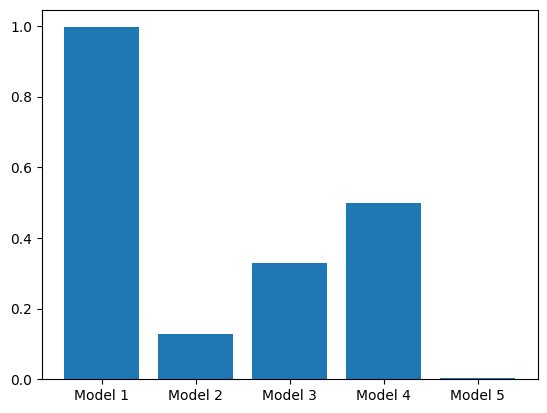

In [88]:
plt.bar(x=["Model 1", "Model 2", "Model 3", "Model 4", "Model 5"], height=[acc_1, acc_2, acc_3, acc_4, acc_5])

#### Looks like we should move forward with Model 1.

Before that, let's explore results through confusion matrix

In [89]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.
    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.
    Args:
      y_true: Array of truth labels (must be same shape as y_pred).
      y_pred: Array of predicted labels (must be same shape as y_true).
      classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
      figsize: Size of output figure (default=(10, 10)).
      text_size: Size of output figure text (default=15).
      norm: normalize values or not (default=False).
      savefig: save confusion matrix to file (default=False).
    Returns:
      A labelled confusion matrix plot comparing y_true and y_pred.
    Example usage:
      make_confusion_matrix(y_true=test_labels, # ground truth test labels
                            y_pred=y_preds, # predicted labels
                            classes=class_names, # array of class label names
                            figsize=(15, 15),
                            text_size=10)
    """
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize it
    n_classes = cm.shape[0]  # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)  # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),  # create enough axis slots for each class
           yticks=np.arange(n_classes),
           xticklabels=labels,  # axes will labeled with class names (if they exist) or ints
           yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black",
                     size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black",
                     size=text_size)

    # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")

### Confusion Matrix: Model 1

It seems more organized and predicted values are mostly true.

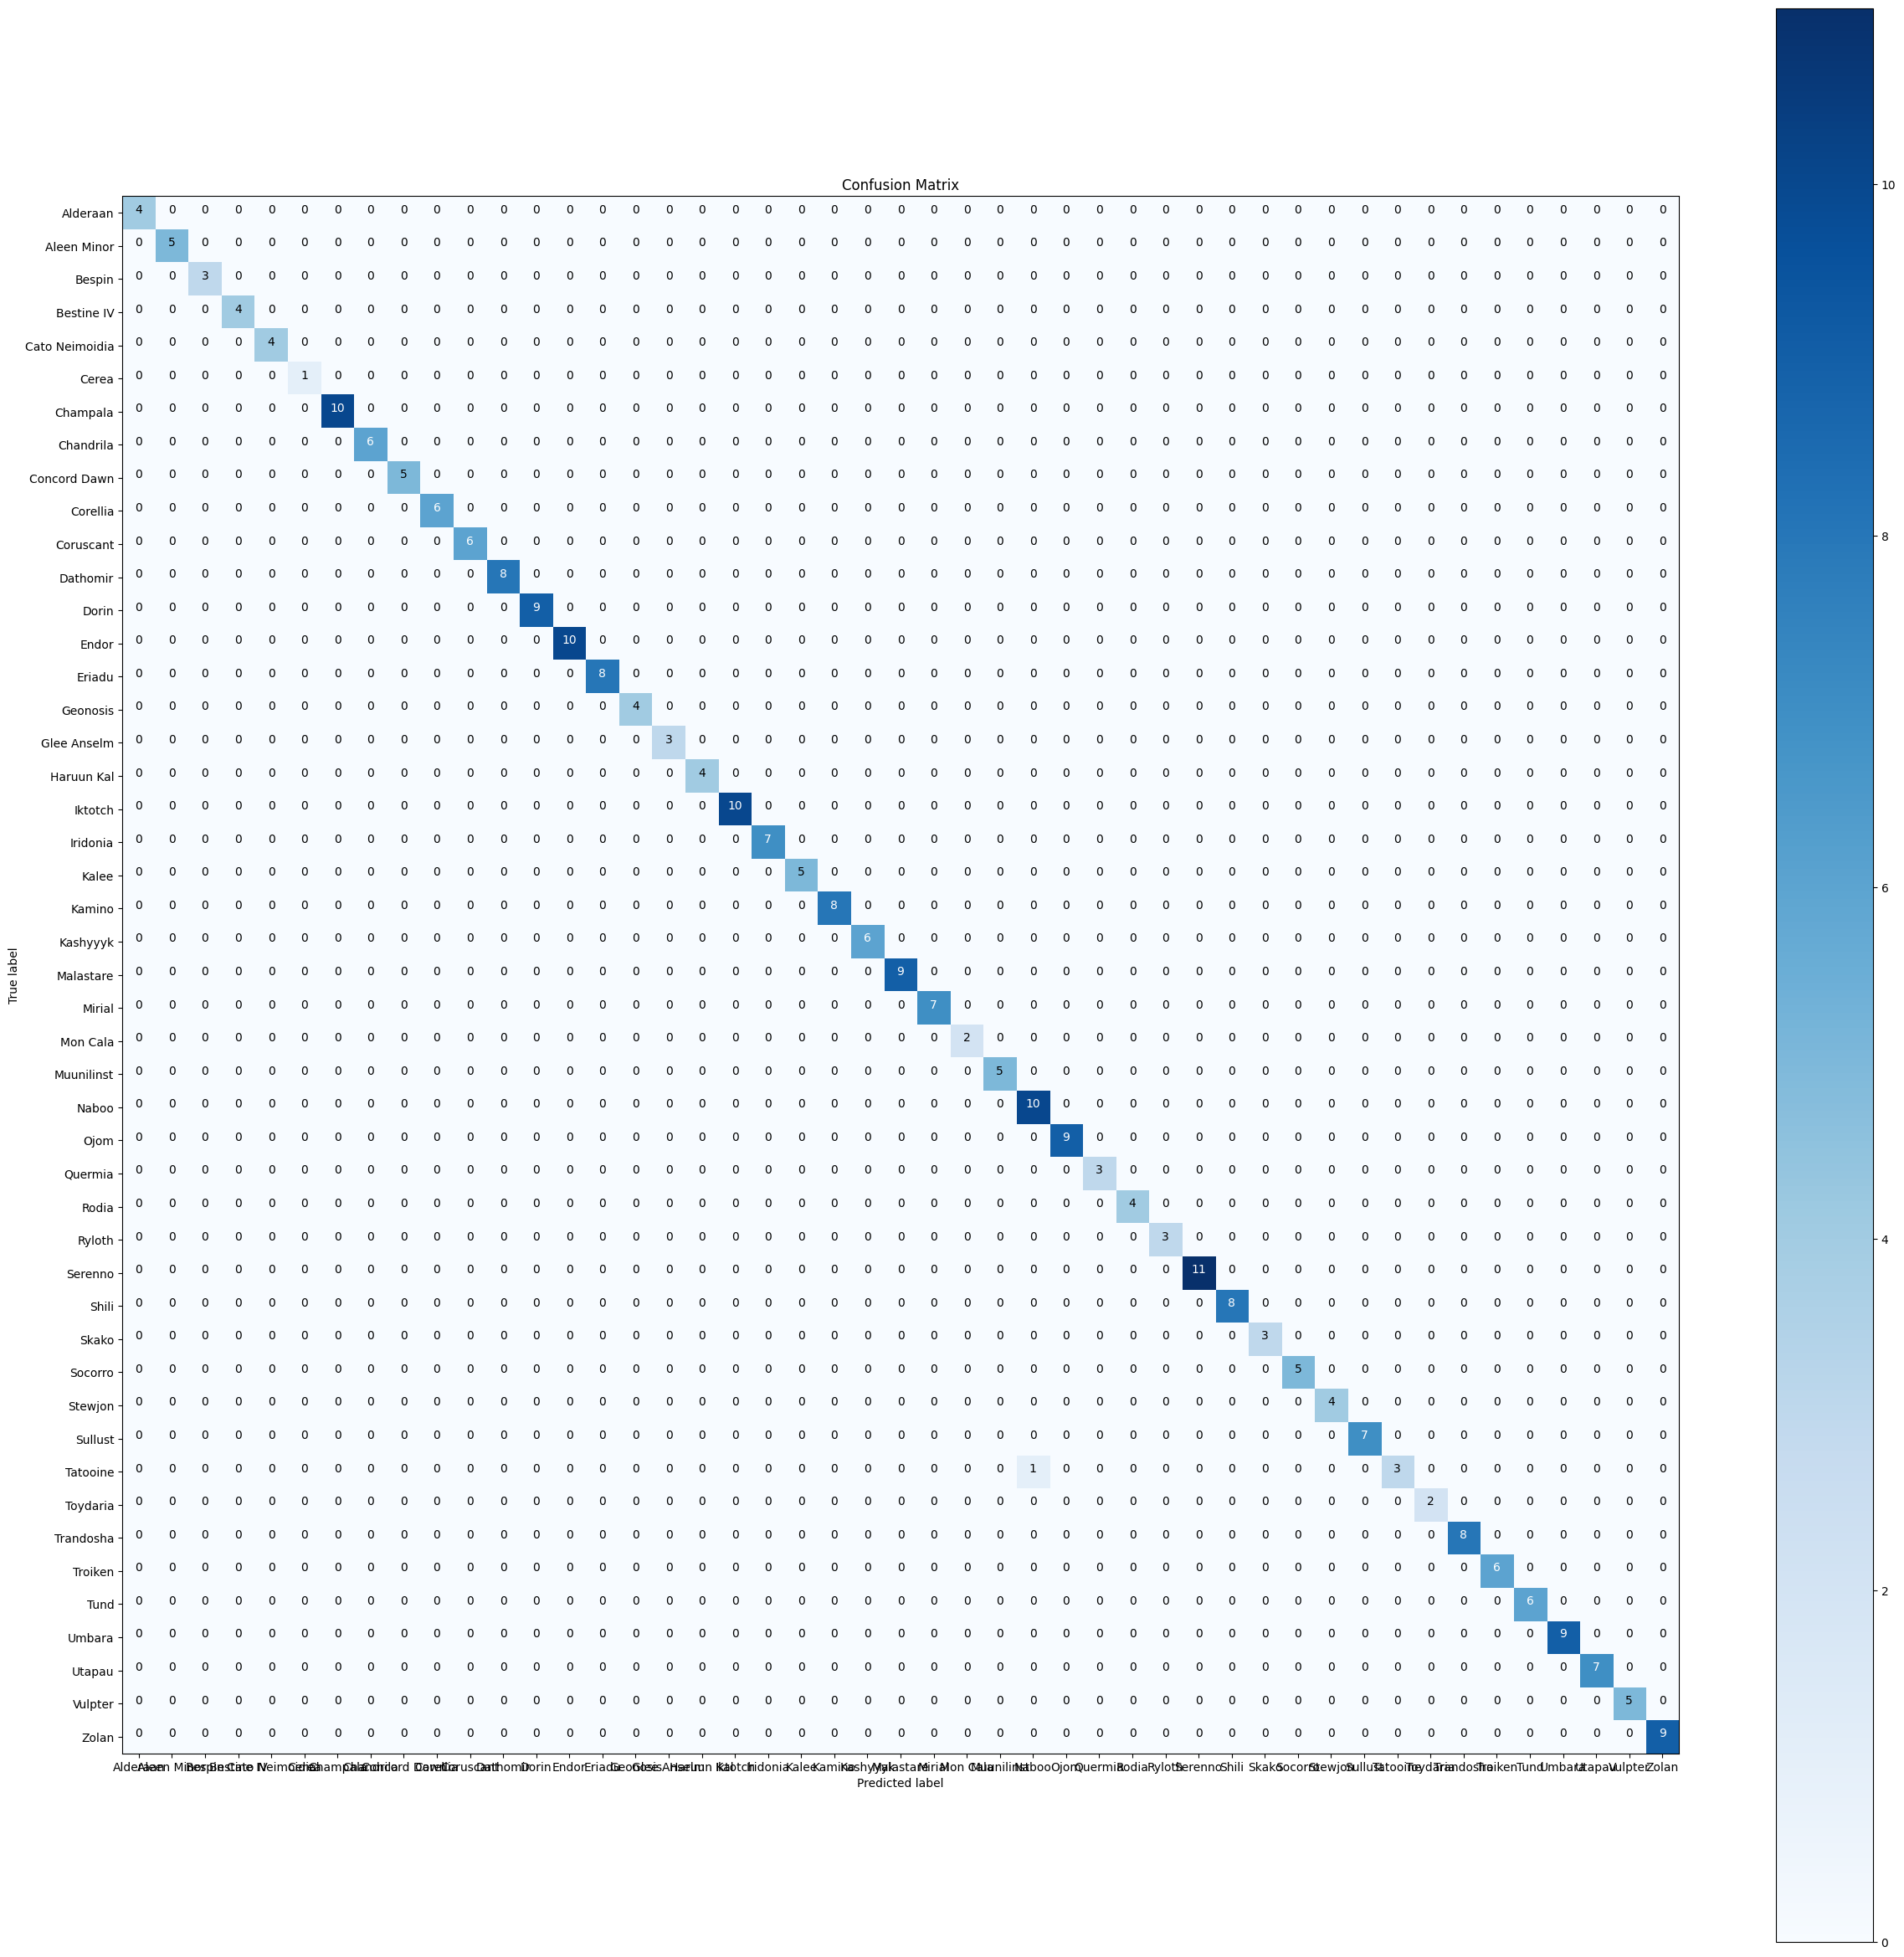

In [90]:
make_confusion_matrix(y_test_tf, y_pred_1.argmax(axis=1), figsize=(30, 30), text_size=10, classes=list(ordinalencoder.categories_[0]))

### Confusion Matrix: Model 2

This output seems to have bias and most of the predictions happeed in two classes.

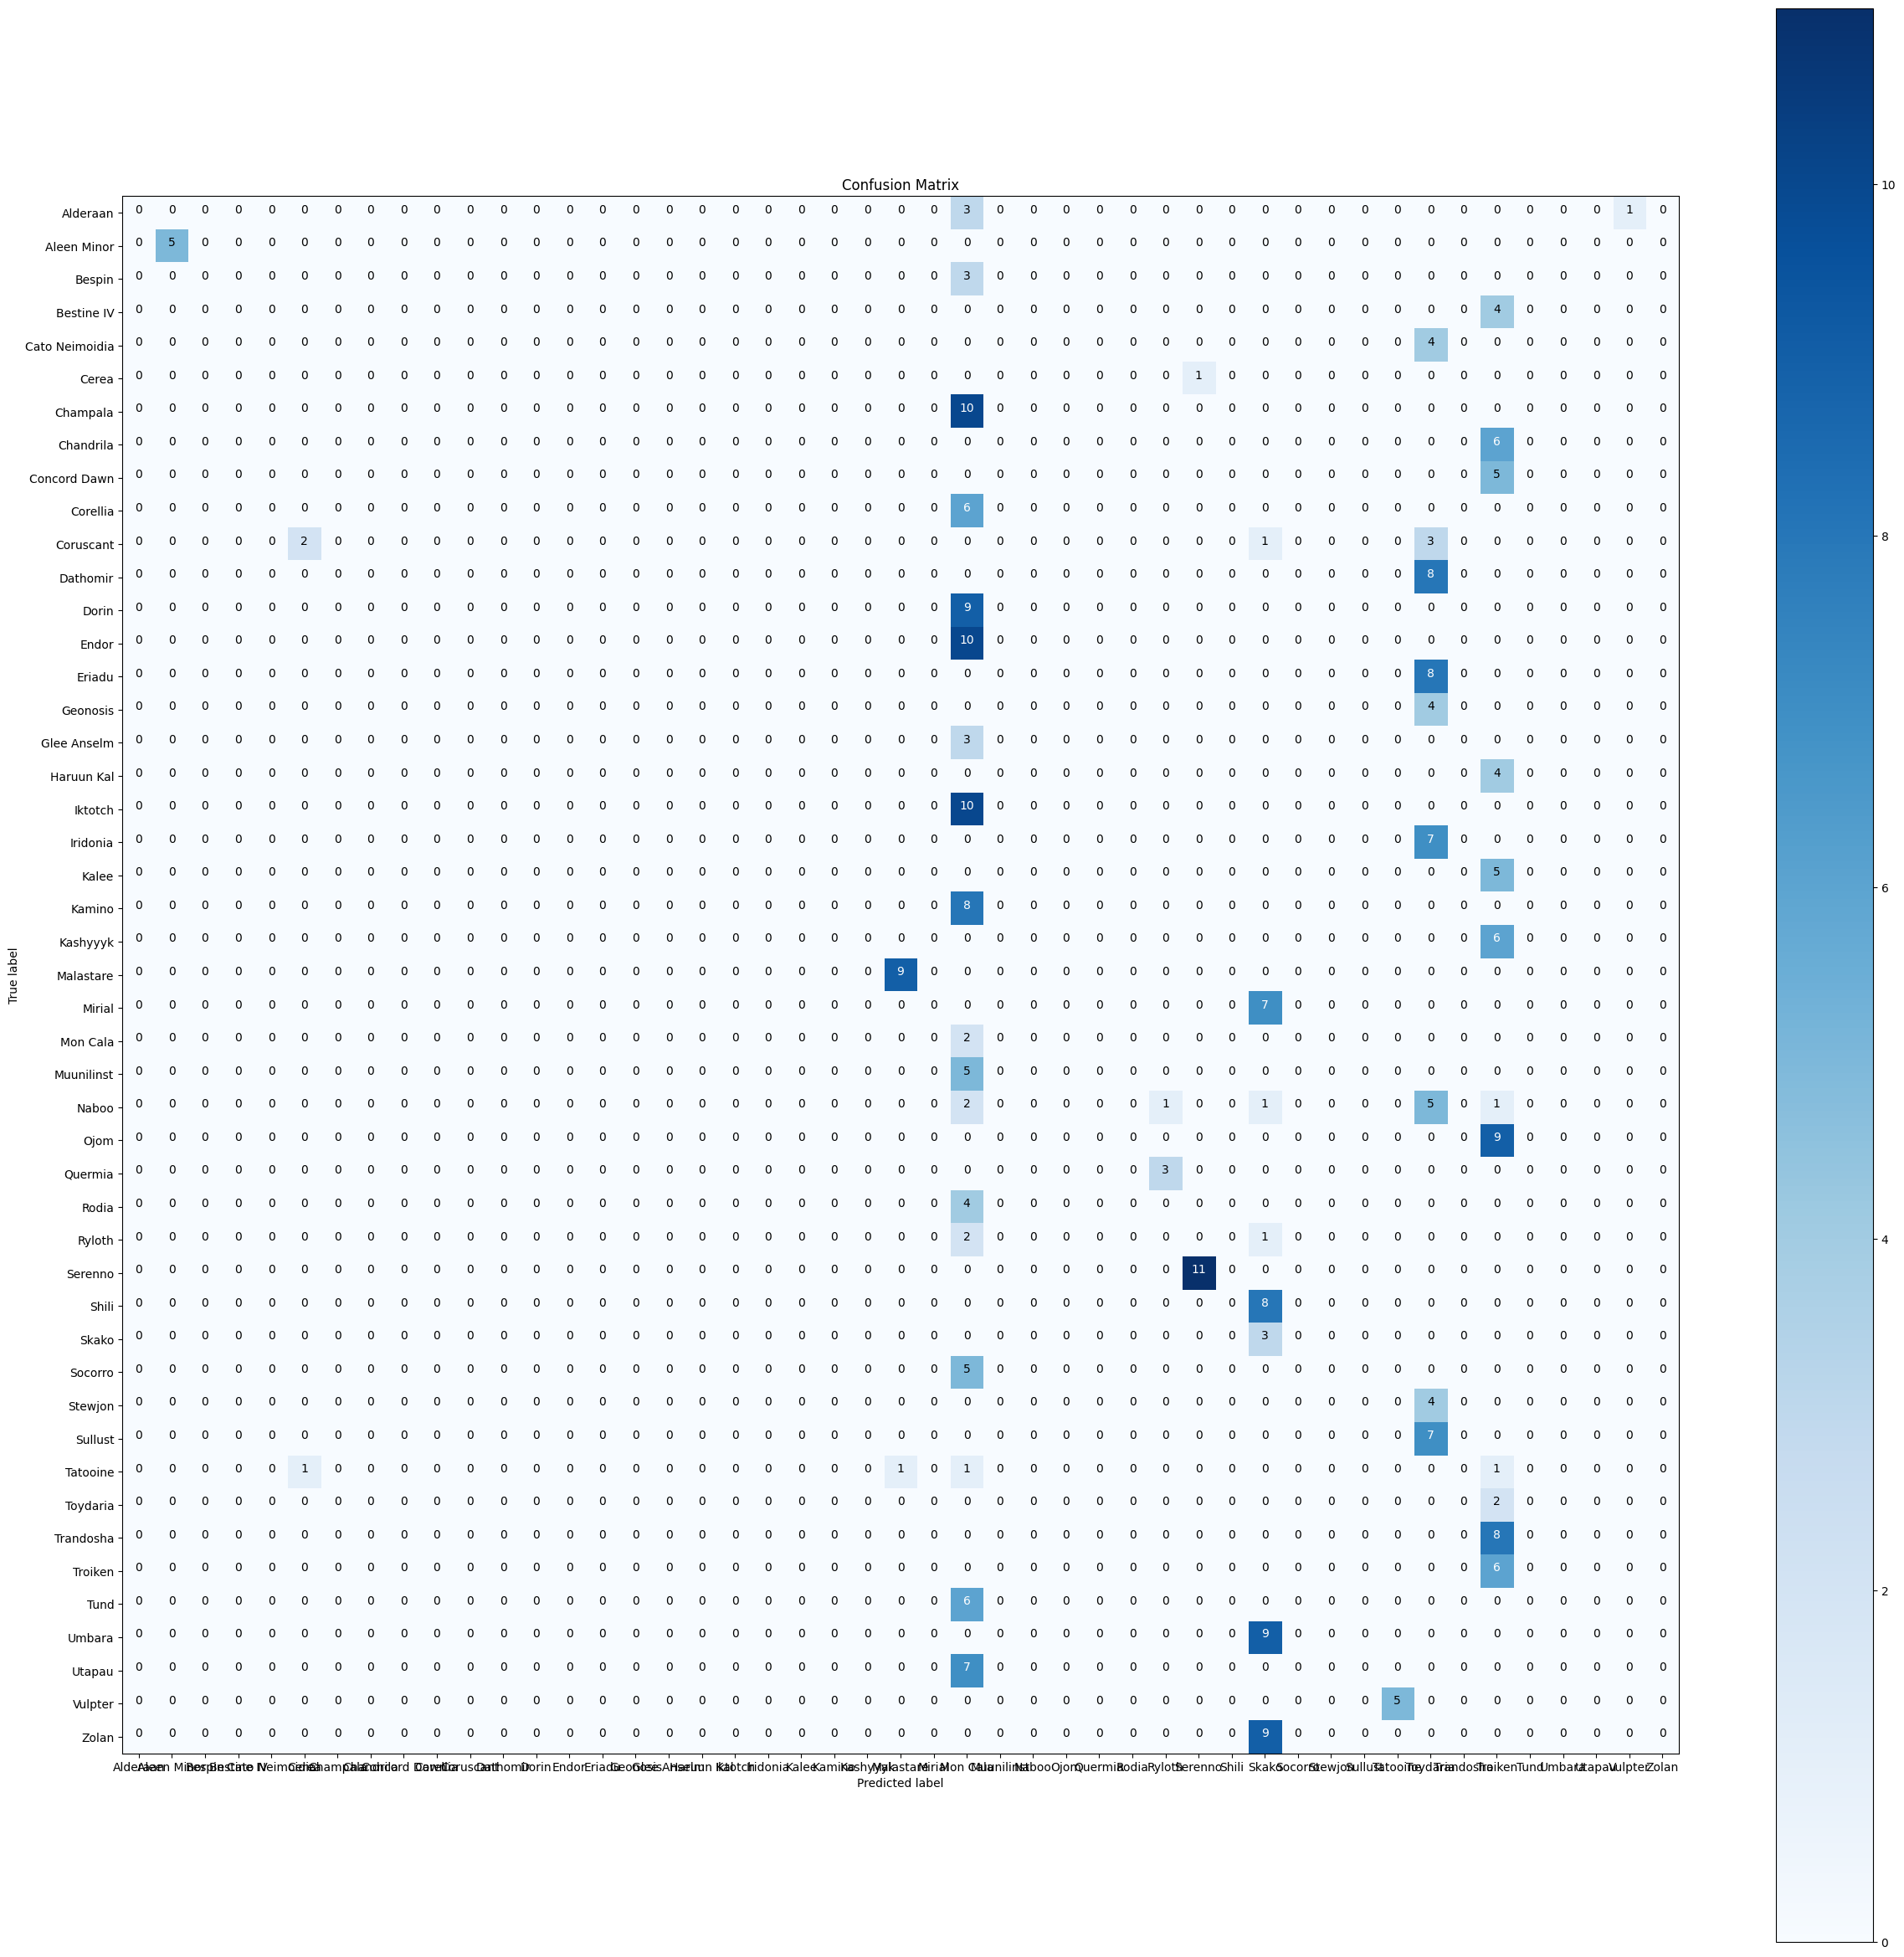

In [91]:
make_confusion_matrix(y_test_tf, y_pred_2.argmax(axis=1), figsize=(30, 30), text_size=10, classes=list(ordinalencoder.categories_[0]))

### Confusion Matrix: Model 3

This model's prediction seems all over the place without any clear pattern.

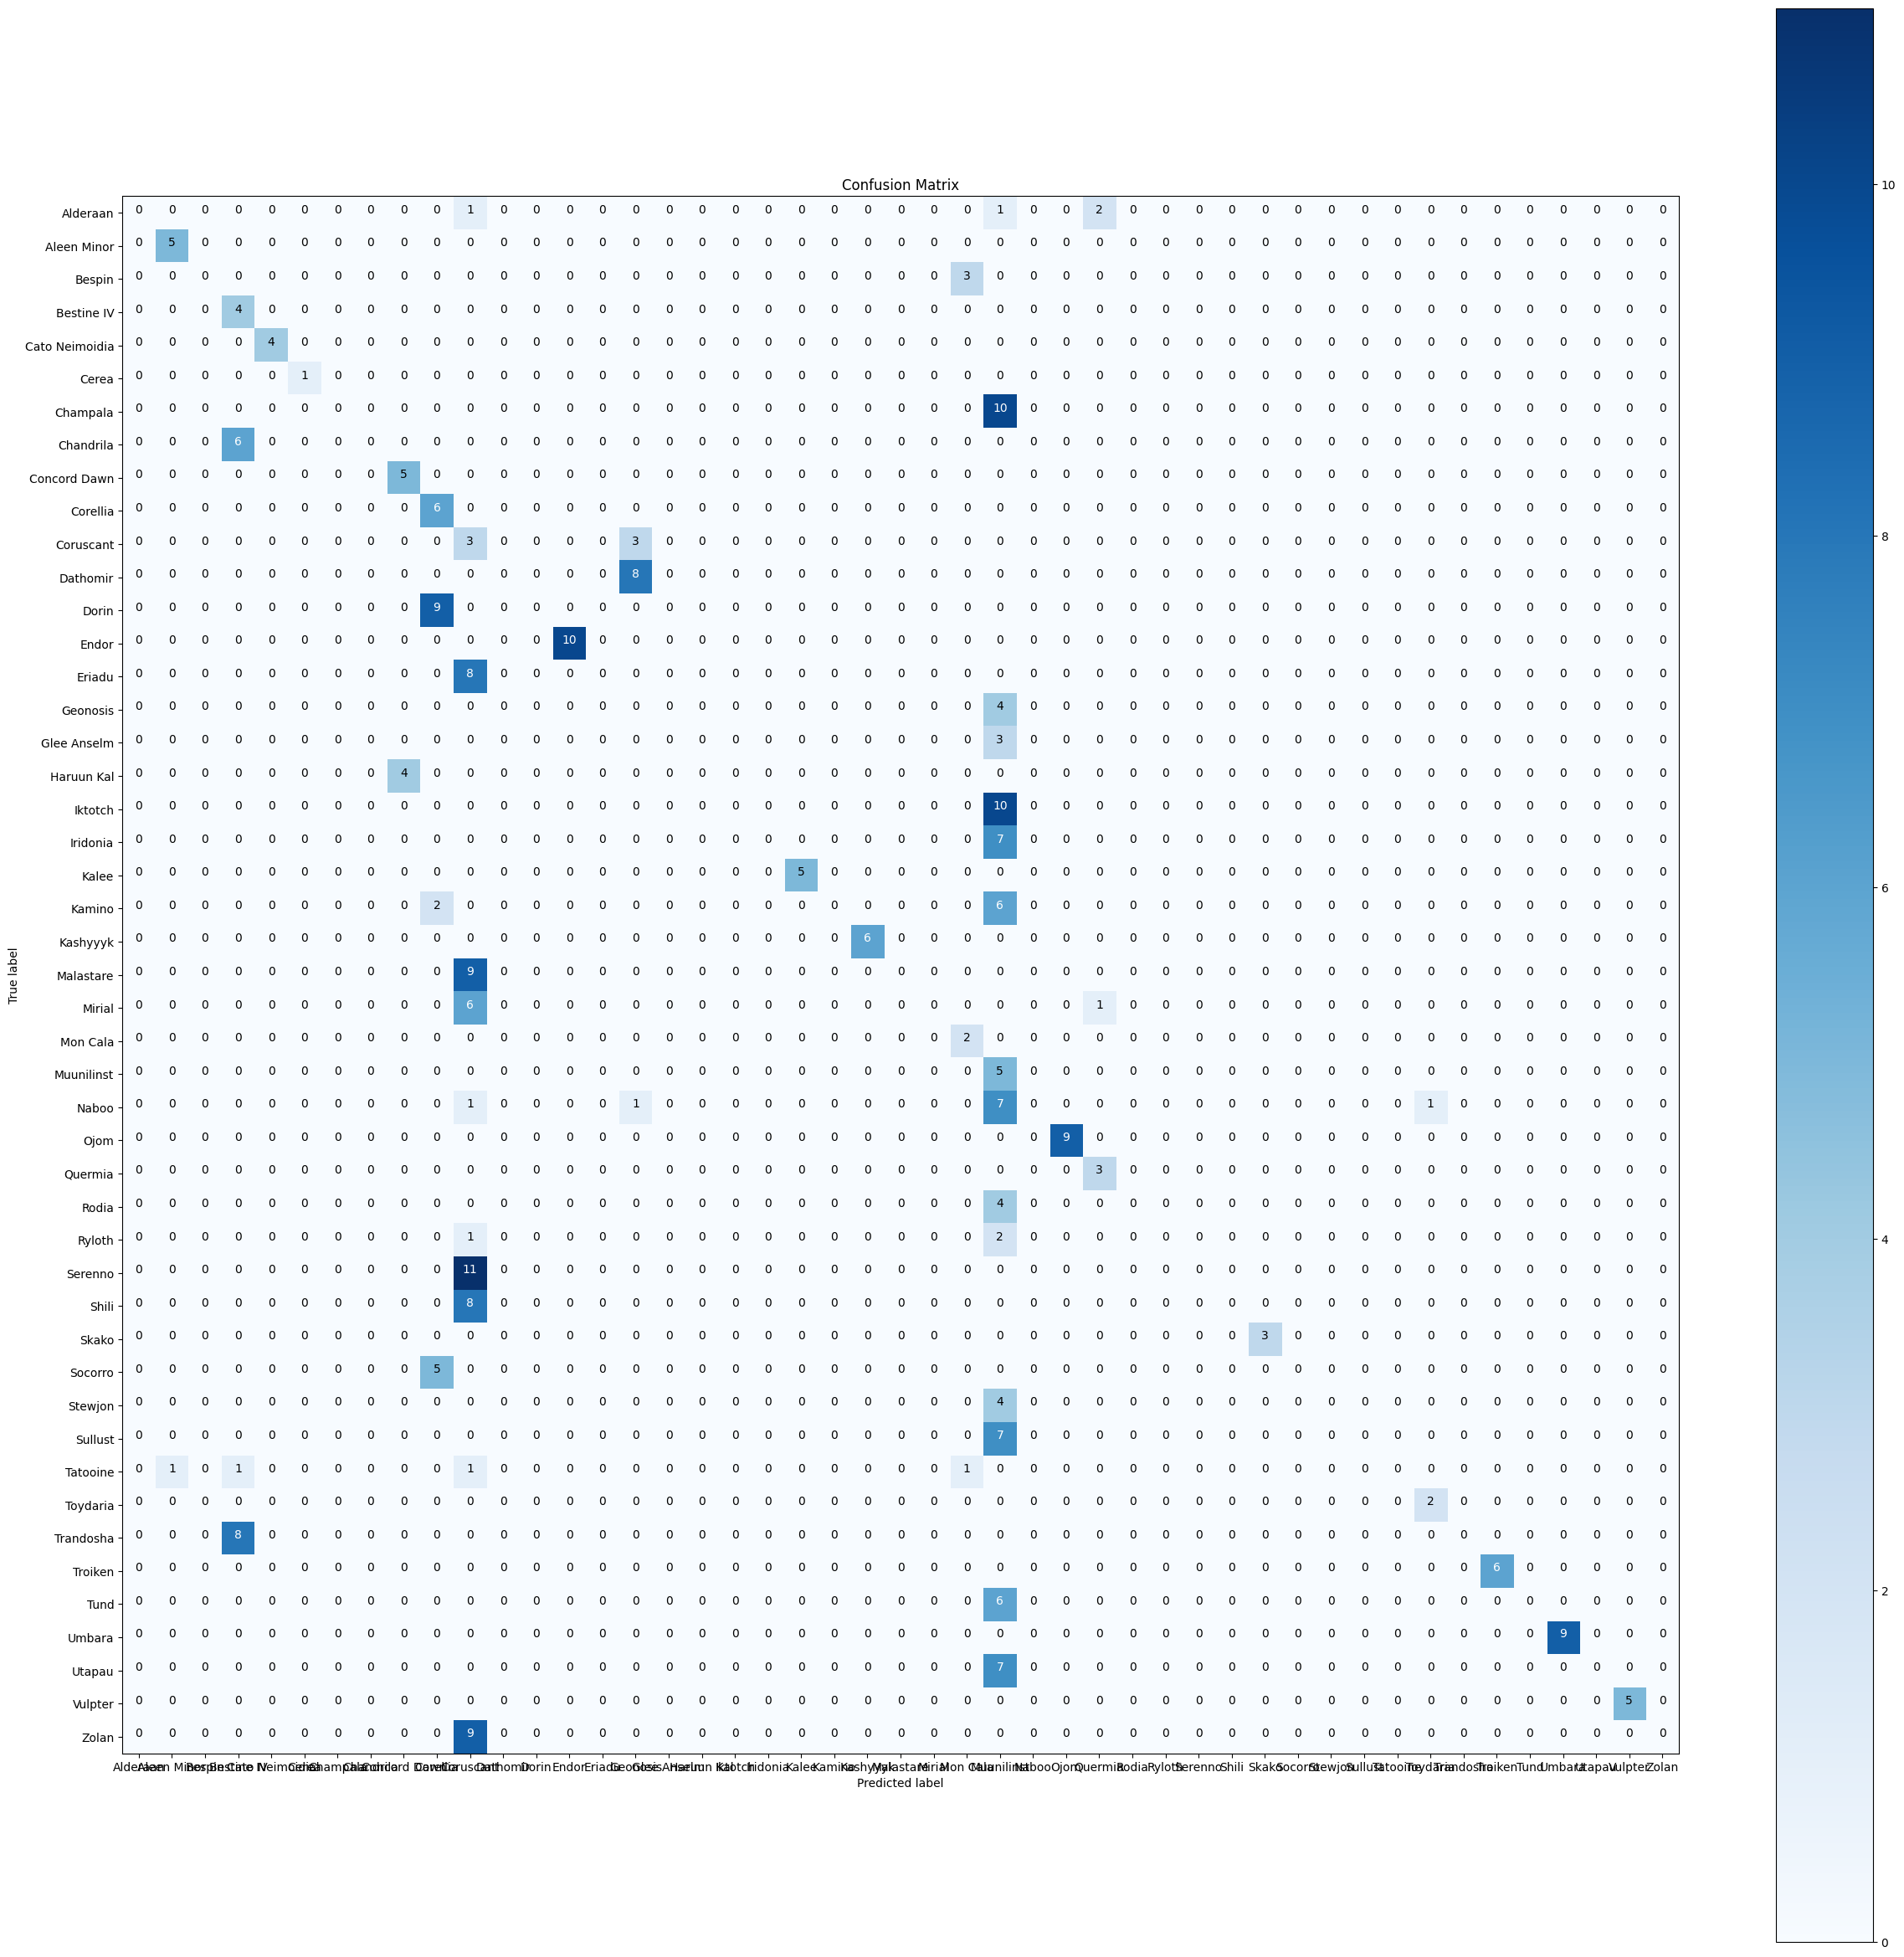

In [92]:
make_confusion_matrix(y_test_tf, y_pred_3.argmax(axis=1), figsize=(30, 30), text_size=10, classes=list(ordinalencoder.categories_[0]))

### Confusion Matrix: Model 4

This model's result is also similar to Model 3

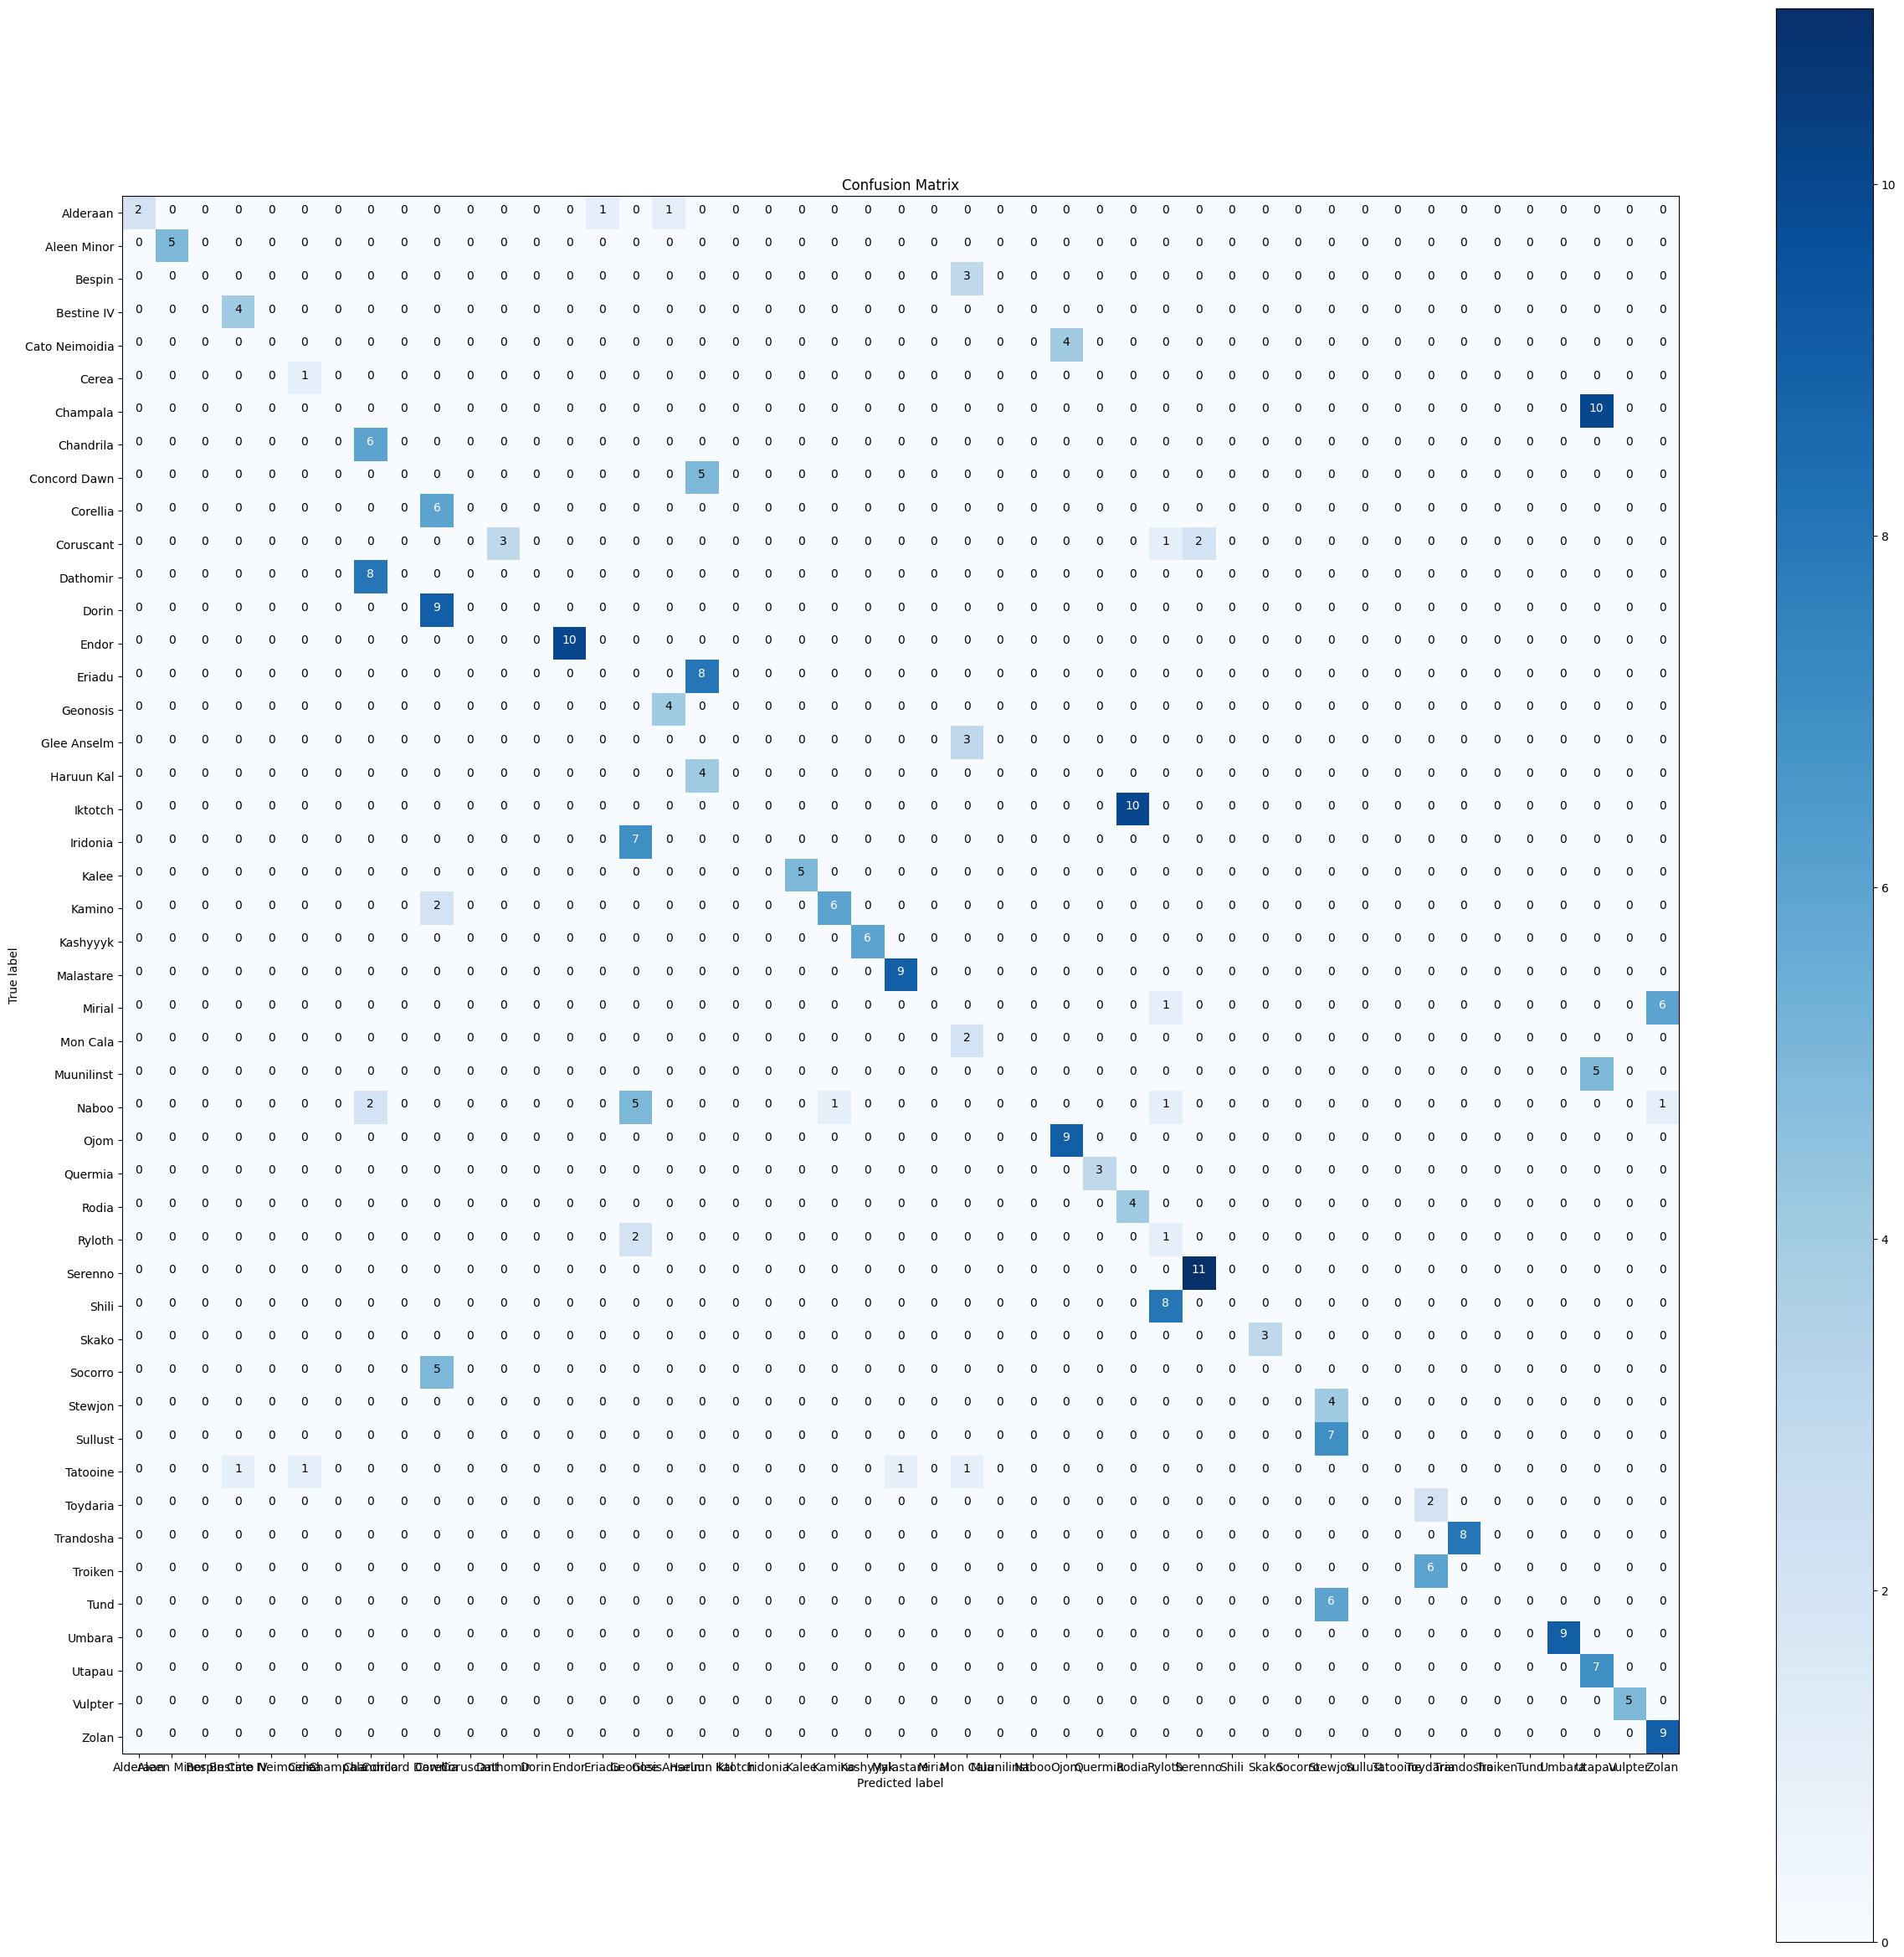

In [93]:
make_confusion_matrix(y_test_tf, y_pred_4.argmax(axis=1), figsize=(30, 30), text_size=10, classes=list(ordinalencoder.categories_[0]))

### Confusion Matrix: Model 5

This model seems to think every character is from Cerea.

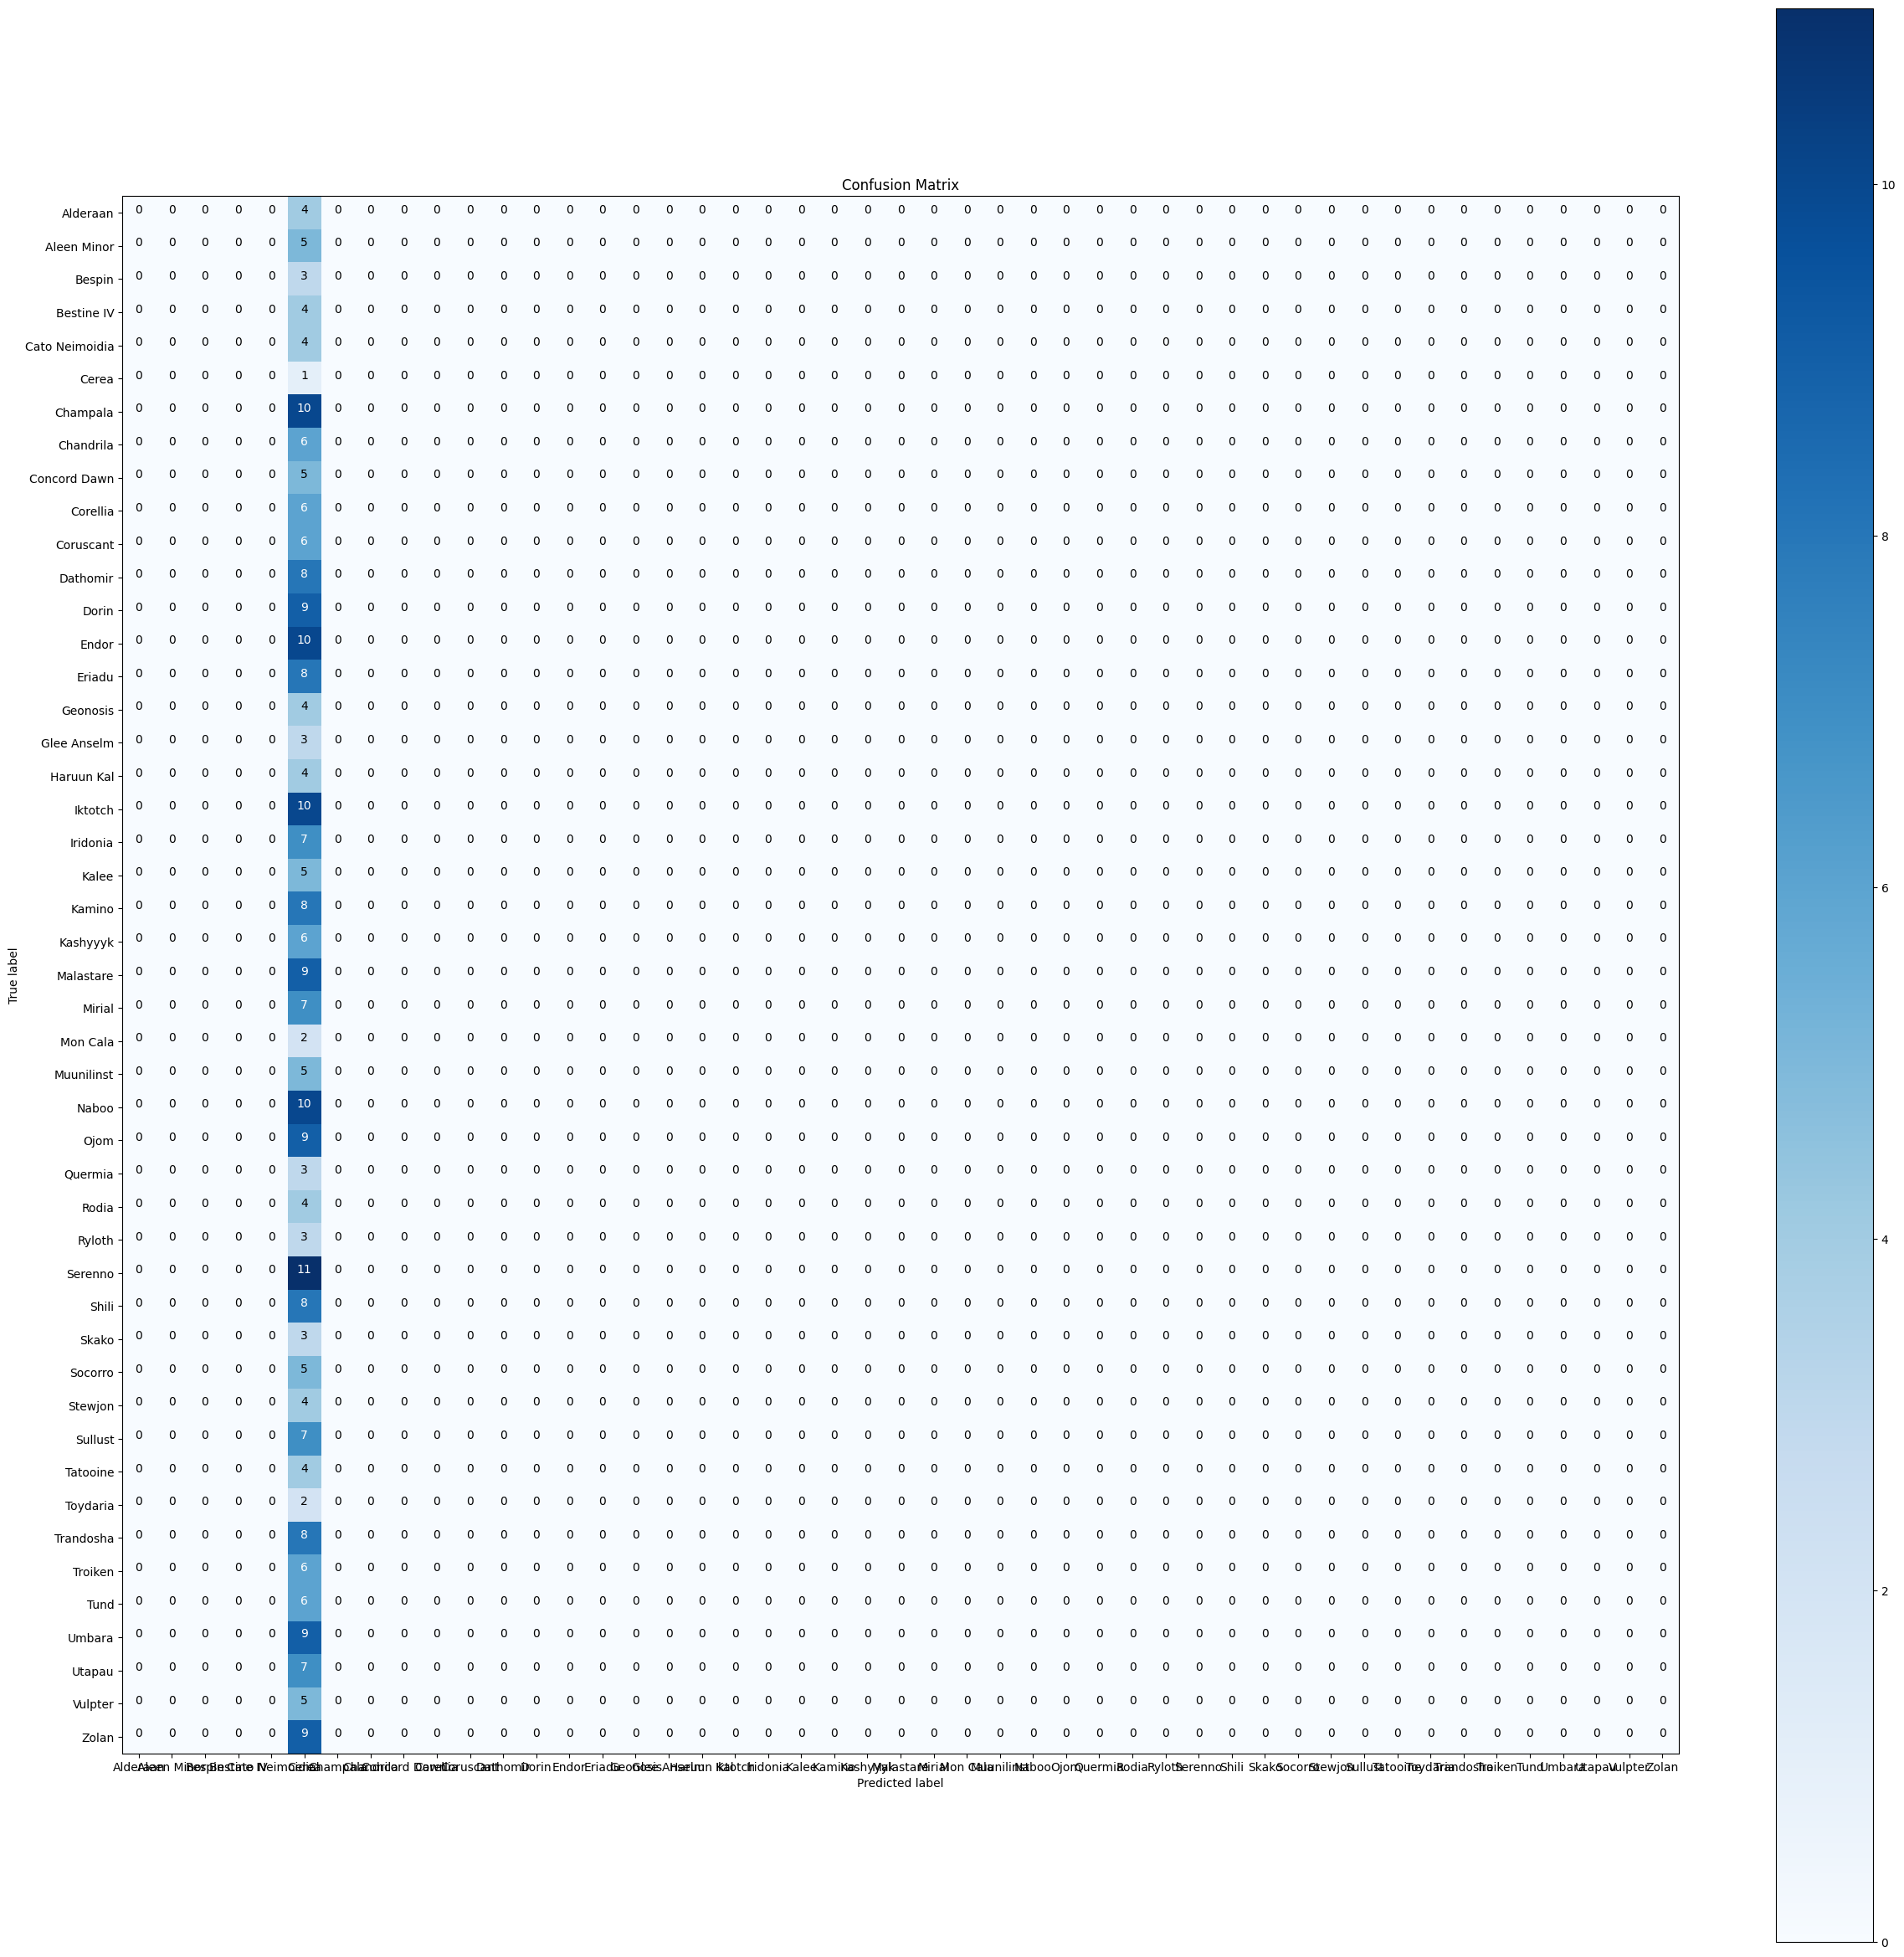

In [94]:
make_confusion_matrix(y_test_tf, y_pred_5.argmax(axis=1), figsize=(30, 30), text_size=10, classes=list(ordinalencoder.categories_[0]))

**Since we got expected output from Model 1. Let's explore it a bit by changing learning rate**

## Model 1_1 - Learning Rate - 0.1

In [95]:
model_1_1 = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation="relu"),
    layers.Dense(47, activation="softmax")
])

model_1_1.compile(loss="sparse_categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.1), metrics=["accuracy"])

In [96]:
history_1_1 = model_1_1.fit(X_train_tf, y_train_tf, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
21/21 [==============================] - 1s 8ms/step - loss: 53.6355 - accuracy: 0.0182 - val_loss: 3.9202 - val_accuracy: 0.0071
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8961 - accuracy: 0.0122 - val_loss: 3.9395 - val_accuracy: 0.0071
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8687 - accuracy: 0.0213 - val_loss: 3.9444 - val_accuracy: 0.0071
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8581 - accuracy: 0.0258 - val_loss: 3.9426 - val_accuracy: 0.0035
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8605 - accuracy: 0.0122 - val_loss: 3.9452 - val_accuracy: 0.0035
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8567 - accuracy: 0.0228 - val_loss: 3.9431 - val_accuracy: 0.0106
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 3.8678 - accuracy: 0.0228 - val_loss: 3.9531 - val_accuracy: 0.0035
Epoch 8/100


Epoch 59/100
21/21 [==============================] - 0s 2ms/step - loss: 3.8560 - accuracy: 0.0198 - val_loss: 3.9519 - val_accuracy: 0.0106
Epoch 60/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8630 - accuracy: 0.0258 - val_loss: 3.9707 - val_accuracy: 0.0035
Epoch 61/100
21/21 [==============================] - 0s 2ms/step - loss: 3.8606 - accuracy: 0.0213 - val_loss: 3.9417 - val_accuracy: 0.0071
Epoch 62/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8615 - accuracy: 0.0198 - val_loss: 3.9519 - val_accuracy: 0.0142
Epoch 63/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8588 - accuracy: 0.0198 - val_loss: 3.9616 - val_accuracy: 0.0035
Epoch 64/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8574 - accuracy: 0.0167 - val_loss: 3.9396 - val_accuracy: 0.0071
Epoch 65/100
21/21 [==============================] - 0s 3ms/step - loss: 3.8583 - accuracy: 0.0198 - val_loss: 3.9582 - val_accuracy: 0.0035
Epoch 

In [97]:
y_pred_1_1 = model_1.predict(X_test_tf)

9/9 [==============================] - 0s 0s/step


In [98]:
model_1_1.evaluate(X_test_tf, y_test_tf)

9/9 [==============================] - 0s 2ms/step - loss: 3.9460 - accuracy: 0.0106


[3.9459519386291504, 0.010638297535479069]

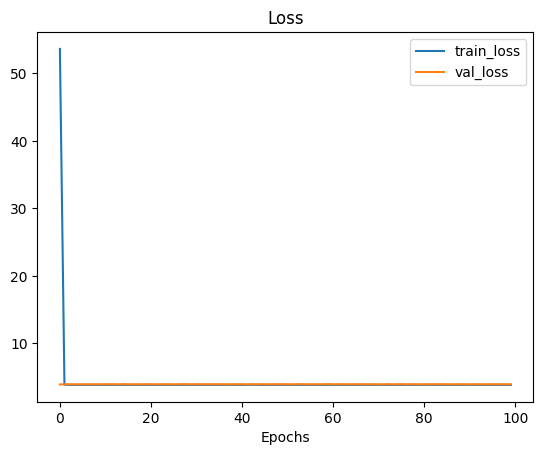

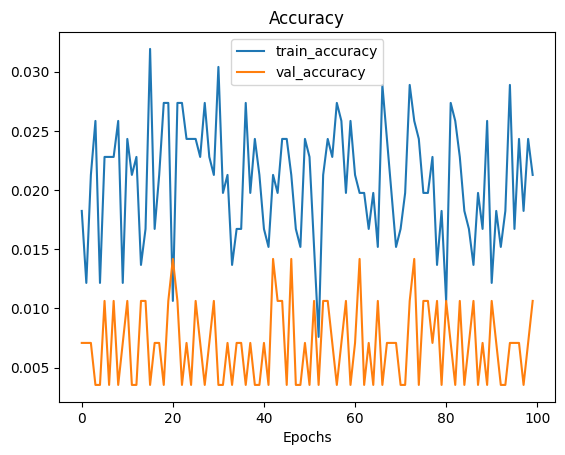

In [99]:
plot_loss_curves(history_1_1)

**As expected, since Model has very high learning rate. We hit new bottom for accuracy.**

## Model 1_2 - Learning rate  - 0.01

In [100]:
model_1_2 = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation="relu"),
    layers.Dense(47, activation="softmax")
])

model_1_2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

In [101]:
history_1_2 = model_1_2.fit(X_train_tf, y_train_tf, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
21/21 [==============================] - 1s 8ms/step - loss: 28.1268 - accuracy: 0.0471 - val_loss: 9.9578 - val_accuracy: 0.0957
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 5.6975 - accuracy: 0.1064 - val_loss: 3.3248 - val_accuracy: 0.0922
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 3.0338 - accuracy: 0.1702 - val_loss: 2.7307 - val_accuracy: 0.2589
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 2.3799 - accuracy: 0.4271 - val_loss: 2.0575 - val_accuracy: 0.5213
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 1.6325 - accuracy: 0.6900 - val_loss: 1.3633 - val_accuracy: 0.7482
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 1.0342 - accuracy: 0.8450 - val_loss: 0.7562 - val_accuracy: 0.9184
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5954 - accuracy: 0.9179 - val_loss: 0.5698 - val_accuracy: 0.9184
Epoch 8/100


Epoch 59/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9929
Epoch 60/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9929
Epoch 61/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 0.9929
Epoch 62/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9929
Epoch 63/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 0.9929
Epoch 64/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0505 - val_accuracy: 0.9929
Epoch 65/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0504 - val_accuracy: 0.9929
Epoch 

In [102]:
y_pred_1_2 = model_1_2.predict(X_test_tf)

9/9 [==============================] - 0s 0s/step


In [103]:
model_1_2.evaluate(X_test_tf, y_test_tf)

9/9 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9929


[0.052771955728530884, 0.9929078221321106]

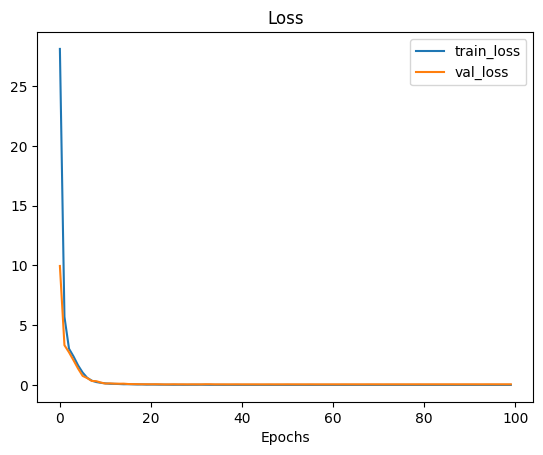

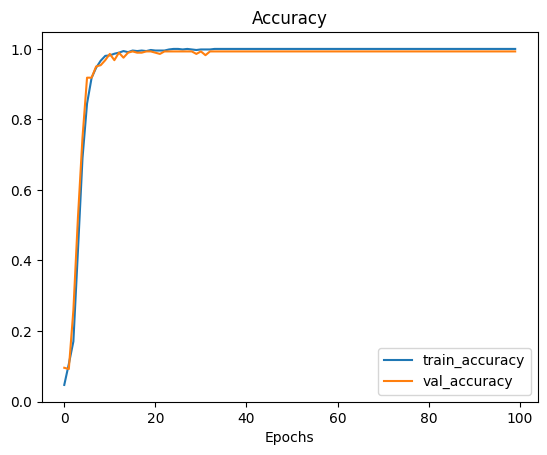

In [104]:
plot_loss_curves(history_1_2)

**Now this result seems more align with what we expecting.**

Let's see if we can improve it by further reducing learning rate.

## Model 1_3 - Learning Rate - 0.001

In [105]:
model_1_3 = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation="relu"),
    layers.Dense(47, activation="softmax")
])

model_1_3.compile(loss="sparse_categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [106]:
history_1_3 = model_1_3.fit(X_train_tf, y_train_tf, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
21/21 [==============================] - 1s 10ms/step - loss: 21.4124 - accuracy: 0.0350 - val_loss: 8.0968 - val_accuracy: 0.0142
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 6.0075 - accuracy: 0.0638 - val_loss: 4.4360 - val_accuracy: 0.1028
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 3.5829 - accuracy: 0.2143 - val_loss: 3.0788 - val_accuracy: 0.2695
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 2.7309 - accuracy: 0.3632 - val_loss: 2.6305 - val_accuracy: 0.2979
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 2.1874 - accuracy: 0.4985 - val_loss: 2.0552 - val_accuracy: 0.5816
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 1.8488 - accuracy: 0.6185 - val_loss: 1.8536 - val_accuracy: 0.6277
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 1.4629 - accuracy: 0.7492 - val_loss: 1.4397 - val_accuracy: 0.7872
Epoch 8/100

Epoch 59/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9985 - val_loss: 0.0685 - val_accuracy: 0.9823
Epoch 60/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9985 - val_loss: 0.0484 - val_accuracy: 0.9929
Epoch 61/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 1.0000 - val_loss: 0.0466 - val_accuracy: 0.9929
Epoch 62/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0239 - accuracy: 0.9985 - val_loss: 0.0472 - val_accuracy: 0.9929
Epoch 63/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.9985 - val_loss: 0.0474 - val_accuracy: 0.9929
Epoch 64/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.0441 - val_accuracy: 0.9929
Epoch 65/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.9985 - val_loss: 0.0443 - val_accuracy: 0.9929
Epoch 

In [107]:
y_pred_1_3 = model_1_3.predict(X_test_tf)

9/9 [==============================] - 0s 0s/step


In [108]:
model_1_3.evaluate(X_test_tf, y_test_tf)

9/9 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9929


[0.03845573216676712, 0.9929078221321106]

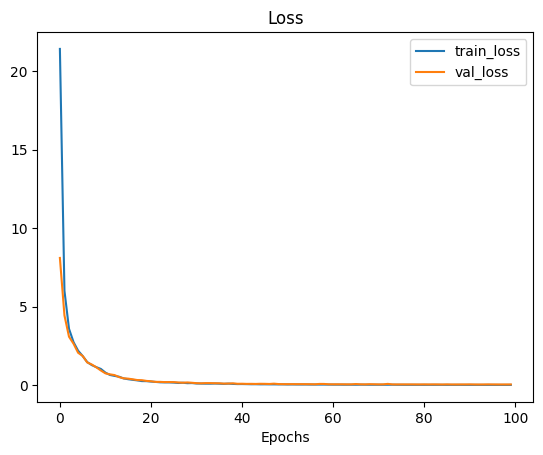

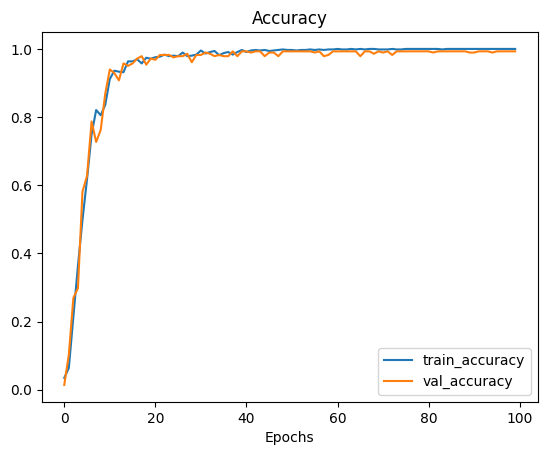

In [109]:
plot_loss_curves(history_1_3)

In [110]:
accuracy_score(y_test_tf, y_pred_1_1.argmax(axis=1))

0.9964539007092199

In [111]:
accuracy_score(y_test_tf, y_pred_1_2.argmax(axis=1))

0.9929078014184397

In [112]:
accuracy_score(y_test_tf, y_pred_1_3.argmax(axis=1))

0.9929078014184397

### It look likes that changing learing rate doesn't affect performance. Maybe because we have very less data